Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student id below:

In [1]:
NAME = "Tunlaton Wongchai"
STUDENT_ID = "63070224"

---

# 1. $k$-mean Clustering

## 1.1 Load Iris dataset and sklearn library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 1.2 Define petal length (cm), petal width (cm), as $X$, Label—0 (Setosa), 1 (Versicolor) and 2 (Virginica) as $y$

In [4]:
X = iris['data'][:,2:]
y = iris['target'].reshape(-1, 1)

## 1.3 Write a function to normalise X to [0, 1]:

$$
    [X_{norm}, X_{max}, X_{min}] = normalise(X)
$$

In [5]:
def normalise(X):   

    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)

    X_norm = (X - X_min) / (X_max - X_min)

    return X_norm, X_max, X_min

In [6]:
X_norm, X_max, X_min = normalise(X)

## 1.4 Write a function to generate centroids for $k$ clusters by randomly select the samples in $X$ to represent the centroids:

$$
    centres = centroidCreate(X, k, random\_seed)
$$

where $centres \in \mathbb{R}^{N_{sample} \times N_{feature}}$ and $random\_seed$ is a random generator number.

In [14]:
def centroidCreate(X, k, random_seed):

    np.random.seed(random_seed)
    std = np.std(X, axis=0)
    mean = np.mean(X, axis=0)

    centers = np.random.rand(k, X.shape[1])*std+mean
    return centers

In [15]:
# Test
centroidCreate(X_norm, 3, 10)

array([[0.69746859, 0.46462435],
       [0.65641412, 0.69508088],
       [0.61611445, 0.52921237]])

## 1.5  Write a function to calculate Euclidean distance between two points, $x_1$ and $x_2$:
$$
distance = euclideanDistance(x_1, x_2)
$$

In [25]:
def euclidean_distance(x1,x2):
    
    distance = np.sqrt(np.sum(np.square(x1-x2)))
    
    
    return distance

In [ ]:
euclidean_distance()

## 1.6 Write a function to calculate sum square error between centroids and their members:

$$
    accuracy = SSE(X, centres, index_{cluster})
$$

where $index_{cluster}$ is an $N_{Sample}$-dimensional vector that consists of cluster label assigned for each sample.

In [10]:
def SSError(X,K,centers,clusters):
    
    error = np.sum(np.mean())
    
    return error

## 1.7 Write a function of k-mean clustering algorithm as the following format:

$$
    [centres, index_{cluster}, SSE_{History}] = kmean(X, k, n_{iteration}, random\_seed)
$$

where 

- $n_{iteration}$ is a number of iteration, 

- $centres$ is a matrix of centroids represented the cluster, 

- $index_{cluster}$ is a $N_{sample}$-dimensional vector that consists of cluster label assigned for each sample, and 

- $SSE_{History}$ is a vector of $SSE$ for each iteration ($SSE_{History} \in \mathbb{R}^{n_{iteration} + 1 \times 1}$)

In [11]:
def Kmeans(X, k, n_iteration, random_seed):
    
    #number of data
    n = X.shape[0]
    
    #Generate Center
    centers = centroidCreate(X, k, random_seed)
    centers_sold = centers.copy()

    centers_new = np.zeros(centers.shape)
    cluster = np.zeros((n))
    distances = np.zeros((n, k))
    sse_history = []
    
    for i in range(n_iteration):
        #Measure the distance to every center of cluster
        for j in range(k):
            distances[:,j] = euclidean_distance(centers[j], X)

        #Find cluster for each data X
        clusters = np.argmin(distances, axis=1)

        #calculate mean of each cluster to update their centroids.
        for j in set(clusters):
            centers_new[j] = np.mean(X[clusters==j], axis=0)

        centers = centers_new.copy()
        sse_history.append(SSError(X, k, centers, clusters))
    
    return centers, clusters, sse_history

In [12]:
centers, clusters, sse_history = Kmeans(X_norm, 2, 100, 10)

In [13]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
centers

array([[0.6620339 , 0.65666667],
       [0.07830508, 0.06083333]])

In [15]:
sse_history

[5.678834863299163,
 5.246286910518258,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,


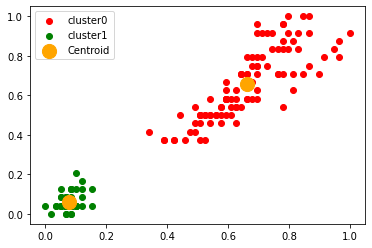

In [16]:
plt.scatter(X_norm[clusters==0,0], X_norm[clusters==0,1], c='red', label='cluster0')
plt.scatter(X_norm[clusters==1,0], X_norm[clusters==1,1], c='green', label='cluster1')

plt.scatter(centers[:,0], centers[:,1], c = 'orange', label='Centroid', s=200)
plt.legend()
plt.show()

## 1.8 Apply k-mean clustering algorithm to the data with $k = 3$ and $random\_seed = 0$. Plot the convergence curve of $SSE$, observe and discuss the result.

In [17]:
## Apply k-mean clustering

# YOUR CODE HERE
raise NotImplementedError()

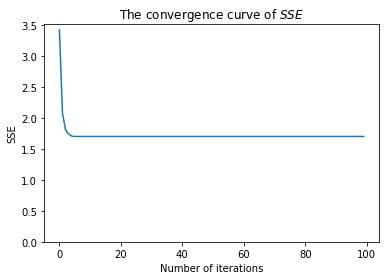

In [18]:
## Plot the convergence curve of SSE

# YOUR CODE HERE
raise NotImplementedError()

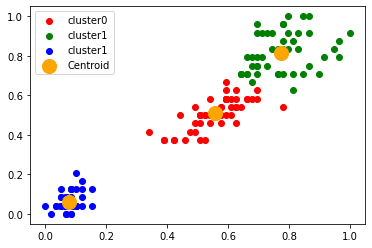

In [19]:
## Plot scatter plot.

# YOUR CODE HERE
raise NotImplementedError()

## 1.9 Observe the effect of $k$ by varying from 1 to $N_{Sample}$. Then plot the optimal $SSE$ against $k$.

<function matplotlib.pyplot.show(close=None, block=None)>

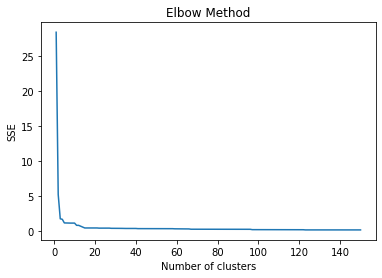

In [20]:
# YOUR CODE HERE
raise NotImplementedError()

## 1.10 Determine the optimal $k$ that is best for this data. How did you choose the number?

In [21]:
# YOUR CODE HERE
raise NotImplementedError()

## 1.11 Create a scatter plot between $X$ and labels acquired from $k$-mean Clustering with the optimal settings and plot all the centroids represented the clusters.

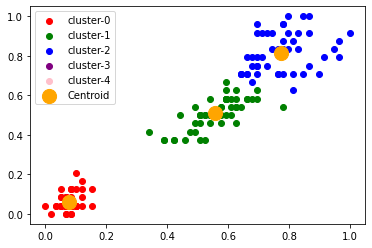

In [22]:
# YOUR CODE HERE
raise NotImplementedError()

## 1.12 Create a scatter plot between $X$ and actual $y$ label. Then compare this graph with the graph from earlier problem. Discuss what you have observed.

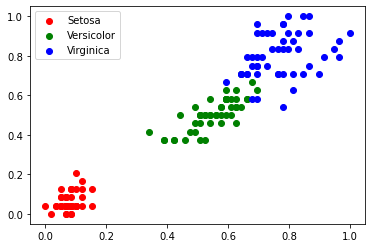

In [23]:
# YOUR CODE HERE
raise NotImplementedError()

## 1.13 Report the performance measure of $k$-mean clustering against actual $y$ label. Then report the mean and standard deviation of each clusters obtained by $k$-mean and actual $y$.

In [24]:
# YOUR CODE HERE
raise NotImplementedError()

SSE: 1.861026
Cluster 0  MEAN: 0.85 STD: 0.62 
Cluster 1  MEAN: 2.81 STD: 1.53 
Cluster 2  MEAN: 3.81 STD: 1.80 
